In [1]:
from manim import *
import numpy as np
from rc_lib.common_mobjects.layouts import LinearLayout, Placeholder

Manim Community v0.17.2

The Linear Layout can be used to position items next to each other along any 
axis.

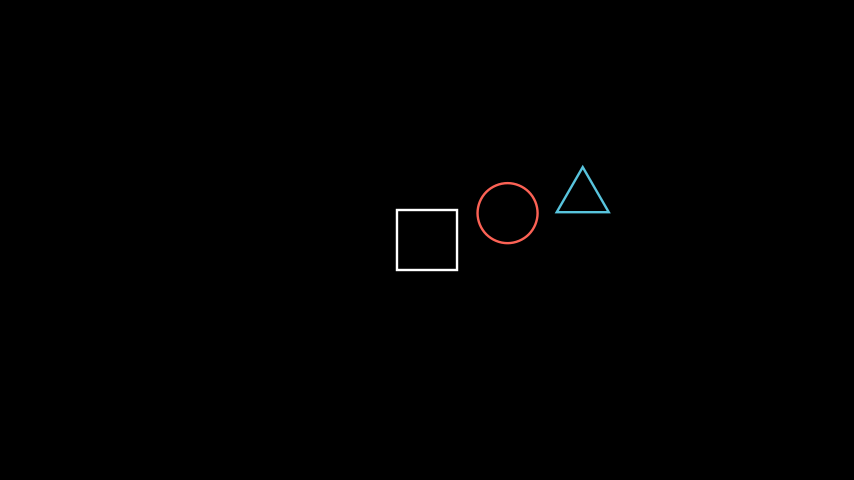

In [2]:
%%manim -ql -v WARNING LinearLayoutStaticDemo
class LinearLayoutStaticDemo(Scene):
    def construct(self):
        items = [Square(), Circle(), Triangle()]
        direction = 3 * RIGHT + UP
        layout = LinearLayout(*items, direction=direction)
        layout.scale(0.5)
        layout.arrange()
        self.add(layout)

If `norm` is disabled, the layout will scale along the axis. To use this, we need
to get the predicted layout manually:

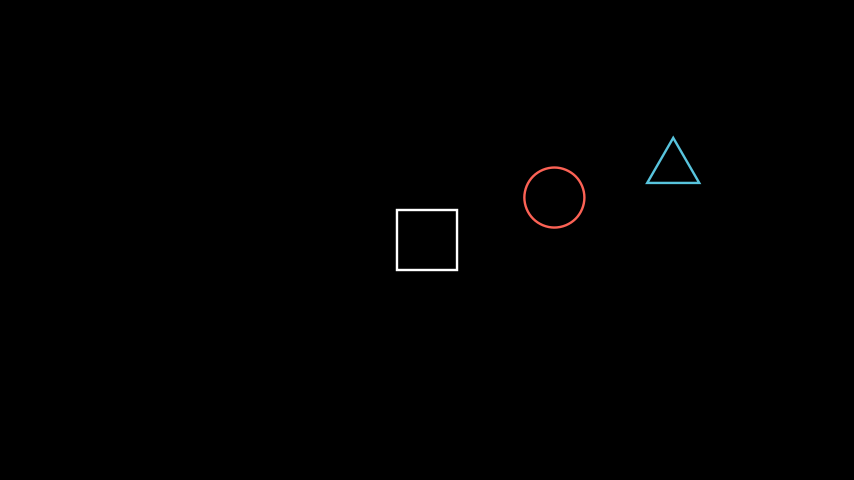

In [3]:
%%manim -ql -v WARNING LinearLayoutScaleDemo
class LinearLayoutScaleDemo(Scene):
    def construct(self):
        items = [Square(), Circle(), Triangle()]
        direction = (3 * RIGHT + UP) / 2 # not normalized: epected to be scaled
        layout =  LinearLayout(*items, direction=direction)
        layout.scale(0.5)
        layout.arrange(positions = layout.predict_arrangement(normalize=False))
        self.add(layout)

We can do more, too- we can specify where to start the layout, and can even
animate transitions:

In [5]:
%%manim -ql -v WARNING LinearLayoutAnimatedDemo
class LinearLayoutAnimatedDemo(Scene):
    def construct(self):
        items = [Square(), Circle(), Triangle()]

        layout = LinearLayout(*items, direction=DOWN)
        layout.scale(0.5)
        layout.arrange()
        self.add(layout)

        def smooth_layout():
            positions = layout.predict_arrangement(root = UP + LEFT)
            animations = layout.animate_arrange(positions = positions)
            self.play(*animations, run_time=3)
        
        layout.set_direction(RIGHT)
        smooth_layout()
        self.wait(1)

        # add a new item in the middle and smoothly insert it
        new_item = Square()
        placeholder = Placeholder(new_item)
        layout.insert(1, placeholder)
        smooth_layout()
        
        new_item.move_to(placeholder.get_center())
        self.play(Create(new_item), run_time = 1)
        layout.replace_placeholder(new_item)
        
        self.wait(2)

        layout.set_direction(LEFT)
        smooth_layout()

        self.wait(2)
